# Linear Least Squares Regression Model

As discussed in the lecture, one of the ways to create a model of $y(x)$ is by considering a linearly weighted combination of basis functions. Mathematically, this can be represented as:

$$
    y(x) \sim \hat{y}(x) = \mathbf{w}^T\Psi(x) = \sum w_i \Psi_i(x)
$$

where $\Psi(x)$ is the vector of basis functions and $\mathbf{w}$ is the vector of weights. The model is linear in terms of weights $w_i$ but basis function $\Psi_i(x)$ can be non-linear. For example, the basis functions vector $\Psi(x)$ can be $[1 \text{  } x \text{  } x^2 \text{  } \sin(x) \text{  } e^{x}]^T$. The weights $w_i$ are determined by minimizing the sum of squared differences between the predictions and actual values. The weights obtained after minimization are given by (refer lecture notes for derivation):

$$
    \mathbf{w} = (\Psi^T\Psi)^{-1}\Psi^T\mathbf{y} = \Psi^{\dagger}\mathbf{y}
$$

where $\mathbf{y}$ is the vector of target values and $\Psi^{\dagger}$ is the (Moore-Penrose) pseudo-inverse of $\Psi$. The pseudo-inverse will be regular inverse if $\Psi$ is invertible.

The choice of basis functions is crucial in determining the performance of the model. In this notebook, the entire process of creating a linear least squares regression model is demonstrated using simple basis functions. Later sections will include more complex basis functions.

Below block of code imports required packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we are trying to create a model for following function:

$$
    y(x) = \sqrt x + 0.5\cos(x)
$$

The training dataset consists of 7 points equally spaced between $0$ and $2\pi$, and testing dataset consists of 100 points equally spaced between $0$ and $2\pi$. Below block of code generates the training and testing datasets, and plots them.

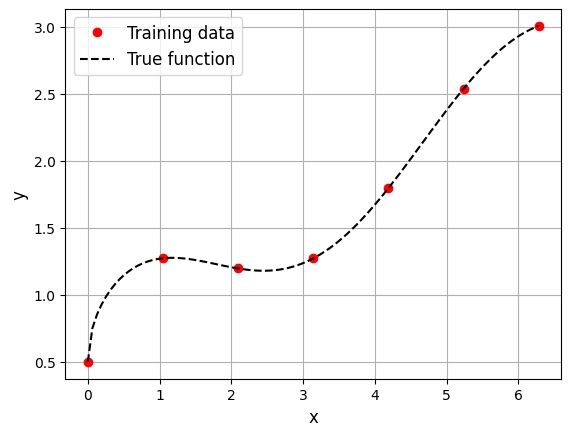

In [3]:
# Training data
xtrain = np.linspace(0, 2*np.pi, 7)
ytrain = np.sqrt(xtrain) + np.cos(xtrain)/2

# Test data
xtest = np.linspace(0, 2*np.pi, 100)
ytest = np.sqrt(xtest) + np.cos(xtest)/2

# Plotting
fs = 12 # Font size
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xtest, ytest, 'k--', label='True function')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()
ax.legend(fontsize=fs)

Assuming that we only have training data (and no knowledge of the true function), we will try to fit a linear model to the training data. Thus, the basis function vector will be:

$$
    \Psi(x) = [1 \quad x]^T
$$

Below block of code defines couple of functions: one to fit a line to given data and another to predict the output for given input. Read comments in the code for more details.

In [4]:
def fit_line(x,y):
    """
        Function to fit a straight line to the data (x,y)

        Parameters:
        ----------- 
        x : ndarray
            x-coordinate of the data points
        y : ndarray
            y-coordinate of the data points

        Returns:
        --------
        w : ndarray
            weight vector
    """
    
    num_pts = len(x)

    # Constructing the basis function matrix
    psi = np.hstack((np.ones(num_pts).reshape(-1,1), x.reshape(-1,1)))

    # Computing psuedo-inverse of psi
    psi_inv = np.linalg.pinv(psi)

    # Computing the weight vector
    w = np.dot(psi_inv, y)

    return w

def predict(x,w):
    """
        Function to predict the output for the given input x

        Parameters:
        -----------
        x : ndarray
            input data points
        w : ndarray
            weight vector

        Returns:
        --------
        y : ndarray
            predicted output
    """

    num_pts = len(x)

    # Constructing the basis function matrix
    psi = np.hstack((np.ones(num_pts).reshape(-1,1), x.reshape(-1,1)))

    # Computing the predicted output
    y = np.dot(psi, w)

    return y

Below block of code uses the function defined above to fit a line to the training data:

In [5]:
w = fit_line(xtrain, ytrain)

print("Weight vector: ", w)

Weight vector:  [0.51394843 0.36318493]


Once the line is fitted to the training data, we can use the model to predict the output for the testing data. Below block of code uses the function defined above to predict the output for the testing data and plots the predictions.

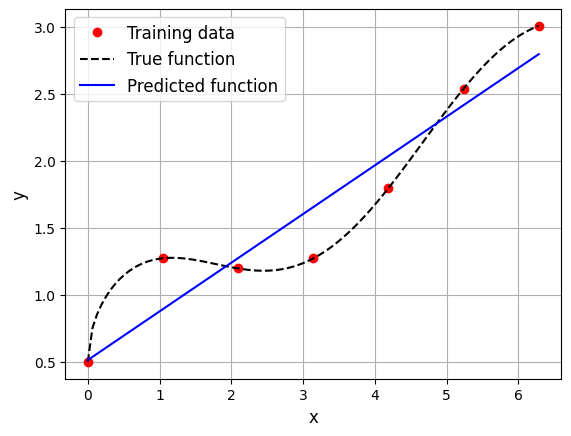

In [6]:
# Predicting the output
ypred = predict(xtest, w)

fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xtest, ytest, 'k--', label='True function')
ax.plot(xtest, ypred, 'b-', label='Predicted function')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()
ax.legend(fontsize=fs)

We are able to obtain a line that minimizes the sum of squared differences. However, the line does not fit the data well. This is because the model is too simple for the given data. We need to use more complex basis functions to create a better model.

Since we know what true function is composed of, we can set basis function vector as $\Psi(x) = [\sqrt x \quad \cos(x)]^T$ and see if we can get correct weight vector. Below block of code updates fit and predict function to accomodate new basis function vector.

In [7]:
def fit(x,y):
    """
        Function to fit a straight line to the data (x,y)

        Parameters:
        ----------- 
        x : ndarray
            x-coordinate of the data points
        y : ndarray
            y-coordinate of the data points

        Returns:
        --------
        w : ndarray
            weight vector
    """

    # Constructing the basis function matrix
    psi = np.hstack((np.sqrt(x).reshape(-1,1), np.cos(x).reshape(-1,1)))

    # Computing psuedo-inverse of psi
    psi_inv = np.linalg.pinv(psi)

    # Computing the weight vector
    w = np.dot(psi_inv, y)

    return w

def predict(x,w):
    """
        Function to predict the output for the given input x

        Parameters:
        -----------
        x : ndarray
            input data points
        w : ndarray
            weight vector

        Returns:
        --------
        y : ndarray
            predicted output
    """

    # Constructing the basis function matrix
    psi = np.hstack((np.sqrt(x).reshape(-1,1), np.cos(x).reshape(-1,1)))

    # Computing the predicted output
    y = np.dot(psi, w)

    return y

Below block of code uses the function defined above to fit the data and predict the output for the testing data:

Weight vector:  [1.  0.5]


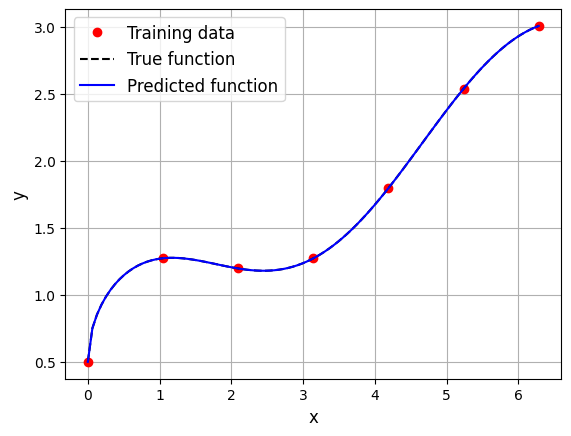

In [8]:
# Fit the model
w = fit(xtrain, ytrain)

print("Weight vector: ", w)

# Predicting the output
ypred = predict(xtest, w)

fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xtest, ytest, 'k--', label='True function')
ax.plot(xtest, ypred, 'b-', label='Predicted function')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()
ax.legend(fontsize=fs)

The obtained weights are $[0.5 \quad 1]$ which exactly matchs the true function. As a result, the prediction is same as true function. This shows that if there is some prior knowledge about the true function, we can incorporate that into basis function to get more accurate results.